# Analysis

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
import os
os.environ["CDF_LIB"] = "~/CDF/lib"
from spacepy import pycdf
# https://spacepy.github.io/pycdf.html

In [3]:
pycdf

<module 'spacepy.pycdf' from '/home/users/sithom/seager19/env/lib/python3.8/site-packages/spacepy/pycdf/__init__.py'>

In [4]:
from spacepy import pycdf
import datetime
time = [datetime.datetime(2000, 10, 1, 1, val) for val in range(60)]
import numpy as np
data = np.random.random_sample(len(time))
cdf = pycdf.CDF('MyCDF.cdf', '')
cdf['Epoch'] = time
cdf['data'] = data
cdf.attrs['Author'] = 'John Doe'
cdf.attrs['CreateDate'] = datetime.datetime.now()
cdf['data'].attrs['units'] = 'MeV'
cdf.close()


/home/users/sithom/seager19/env/lib/python3.8/site-packages/spacepy/pycdf/__init__.py:1949: DeprecationWarning: spacepy.pycdf.lib.set_backward not called; making backward-compatible CDF. This default will change in the future.
  warnings.warn(
/home/users/sithom/seager19/env/lib/python3.8/site-packages/spacepy/pycdf/__init__.py:4200: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if d.dtype == numpy.object: #this is probably going to be bad
/home/users/sithom/seager19/env/lib/python3.8/site-packages/spacepy/pycdf/__init__.py:2390: DeprecationWarning: No type specified for time input; assuming CDF_EPOCH. This will change to TT2000 in the future, on systems which support it.
  warnings.warn(
/home/users/sithom/seager19/env/lib/pytho

In [5]:
ls -lash

total 17M
   0 drwxr-xr-x 3 sithom users    0 Jun 11 13:34 ./
   0 drwxr-xr-x 4 sithom users    0 Apr  8 18:04 ../
   0 -rw-r--r-- 1 sithom users    0 Apr  8 18:04 .gitkeep
   0 drwxr-xr-x 2 sithom users    0 Jun 10 20:57 .ipynb_checkpoints/
 18K -rw-r--r-- 1 sithom users  18K Jun 11 13:34 MyCDF.cdf
 52K -rw-r--r-- 1 sithom users  52K Apr 11 22:00 animate-all.ipynb
 16K -rw-r--r-- 1 sithom users  16K Apr 10 23:55 animate-sst.ipynb
512K -rw-r--r-- 1 sithom users 512K Jun 10 09:37 atmos-mod.ipynb
248K -rw-r--r-- 1 sithom users 248K Jun 11 13:33 cdf_stress.ipynb
851K -rw-r--r-- 1 sithom users 851K Jun 10 20:30 coup-mod.ipynb
 31K -rw-r--r-- 1 sithom users  31K May 13 18:36 decode-test.ipynb
378K -rw-r--r-- 1 sithom users 378K Apr 10 20:11 download-test.ipynb
2.0K -rw-r--r-- 1 sithom users 1.9K Jun  6 13:50 emulkit.ipynb
 512 lrwxrwxrwx 1 sithom users   11 Jun  3 23:02 gifs -> ../../gifs//
1.2M -rw-r--r-- 1 sithom users 1.2M Jun 10 10:48 nino.ipynb
174K -rw-r--r-- 1 sithom users 174K Jun  

In [3]:
# set up plotting settings for dark mode.
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_utils import ps_defaults
ps_defaults(use_tex=False, dpi=150)

In [4]:
import shutil

In [5]:
from src.constants import TEST_DIREC

In [10]:
os.listdir(TEST_DIREC / "ocean" / "DATA")

['dQdf-sample.nc',
 'dQdT-sample.nc',
 'om_mask.nc',
 'qflx-0.nc',
 'qflx.nc',
 'qflx-test.nc',
 'rzk.pro',
 'spline_ECMWF.txt',
 'sst-ECMWF-clim.nc',
 'tau-ECMWF-clim.x',
 'tau-ECMWF-clim.y',
 'tau-ECMWF.x',
 'tau-ECMWF.y',
 'it0dq_df.nc',
 'it0_dq_dt.nc',
 'it1dq_df.nc',
 'it1_dq_dt.nc',
 'it2dq_df.nc',
 'it2_dq_dt.nc',
 'it3dq_df.nc',
 'it3_dq_dt.nc',
 'it4dq_df.nc',
 'it4_dq_dt.nc']

In [6]:
import xarray as xr

In [14]:
tau_obj = xr.open_dataarray(str(TEST_DIREC / "ocean" / "DATA" / "tau-ECMWF-clim.x"), decode_times=False)

<xarray.DataArray 'taux' (T: 12, Z: 1, Y: 181, X: 360)>
[781920 values with dtype=float32]
Coordinates:
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * T        (T) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * Z        (Z) float32 0.0
Attributes:
    units:          N/m2
    dodsname:       taux
    long_name:      taux
    standard_name:  surface_downward_eastward_stress
    longname:       taux
    history:        [(Tue Nov 27 12:35:57 2018: ncpdq -O -a T,Z,Y,X temp.nc t...

In [7]:
tau_clim_obj = xr.open_dataarray(str(TEST_DIREC / "ocean" / "DATA" / "tau-ECMWF-clim.x"), decode_times=False)

In [18]:
tau_obj = xr.open_dataarray(str(TEST_DIREC / "ocean" / "DATA" / "tau-ECMWF.x"), decode_times=False)

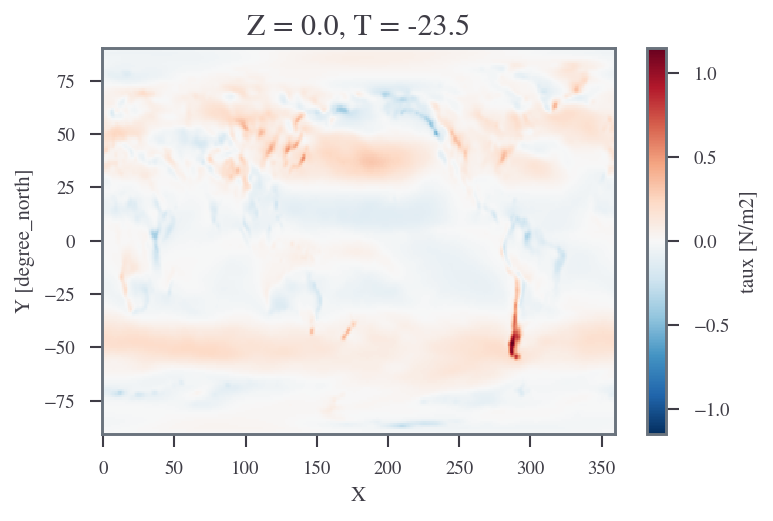

In [20]:
tau_obj.isel(T=0).plot()

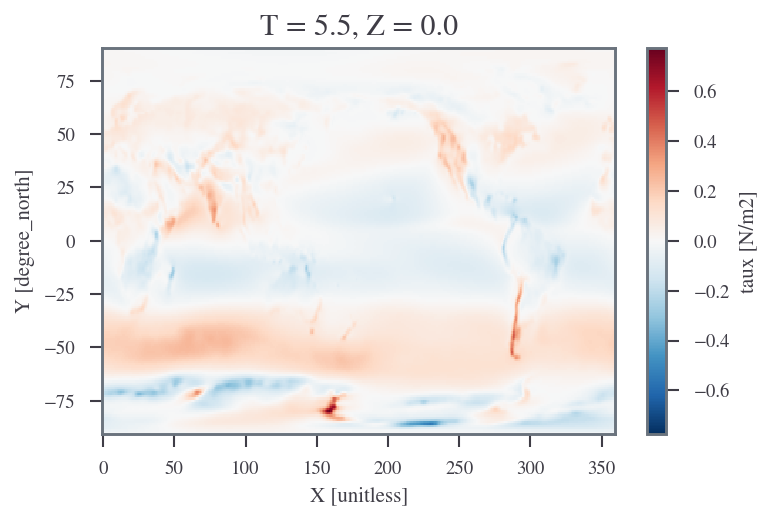

In [22]:
tau_clim_obj.isel(T=5).plot()

In [23]:
print(tau_clim_obj)

<xarray.DataArray 'taux' (T: 12, Z: 1, Y: 181, X: 360)>
[781920 values with dtype=float32]
Coordinates:
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * T        (T) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * Z        (Z) float32 0.0
Attributes:
    units:          N/m2
    dodsname:       taux
    long_name:      taux
    standard_name:  surface_downward_eastward_stress
    longname:       taux
    history:        [(Tue Nov 27 12:35:57 2018: ncpdq -O -a T,Z,Y,X temp.nc t...


In [24]:
tau_clim_obj.to_netcdf("test.nc")

In [26]:
test_nc = xr.open_dataarray("test.nc", decode_times=False)

In [28]:
import recursive_diff

In [31]:
for x in recursive_diff.recursive_diff(test_nc, tau_clim_obj):
    print(x)

In [49]:
tau_clim_obj.to_netcdf("test.x")

In [33]:
str(TEST_DIREC / "ocean" / "DATA" / "tau-ECMWF-clim.x"), "test.x"

('/home/users/sithom/seager19/src/test/test_direc/ocean/DATA/tau-ECMWF-clim.x',
 'test.x')

In [ ]:
with open("test.x", "r+b") as f:
     f.write(chr(10) + chr(20) + chr(30) + chr(40))

In [75]:
with open("test.x", 'r+b') as f:
  bytes = f.read(12)
  print("bytes", bytes)

bytes b'CDF\x01\x00\x00\x00\x00\x00\x00\x00\x00'


In [59]:
with open(str(TEST_DIREC / "ocean" / "DATA" / "tau-ECMWF-clim.x"), 'r+b') as f:
  bytes = f.read(10)
  print("bytes", bytes)

bytes b'CDF\x01\x00\x00\x00\x00\x00\x00'


In [ ]:
import xarray as xr
from src.constants import TEST_DIREC

tau_clim_obj = xr.open_dataarray(str(TEST_DIREC / "ocean" / "DATA" / "tau-ECMWF-clim.x"), decode_times=False)
tau_clim_obj.to_netcdf("test.x")
byte_num = 12

with open(str(TEST_DIREC / "ocean" / "DATA" / "tau-ECMWF-clim.x"), "r+b") as f:
    byt = f.read(byte_num)
    print(byt)

with open("test.x", "r+b") as f:
    print(byt)
    newbytes = byt
    f.seek(0)
    f.write(newbytes)
    
with open("test.x", "r+b") as f:
    byt = f.read(byte_num)
    print(byt)

In [ ]:
xr.open_dataarray("test.x", decode_times=False)

In [ ]:
import shutil

shutil.copy(str(TEST_DIREC / "ocean" / "DATA" / "tau-ECMWF-clim.x"), "tau-ECMWF-clim.x")

In [ ]:
import os
newline = os.linesep # Defines the newline based on your OS.

source_fp = open("test.x", 'r+b')
target_fp = open('target-filename', 'w+b')
first_row = True
for row in source_fp:
    if first_row:
        row = 'the first row now says this.'
        first_row = False
    target_fp.write(row + newline)